Notebook 1 - Parte 1 do Trabalho

In [1]:
#Instalações
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import random

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Definir o Perceptor

In [2]:
class PerceptronRosenblat():
  def __init__(self):
    #Vies
    self.vies = 1
    #Ao iniciar a classe, os pesos são atribuidos de forma randomica
    self.pesos= np.array([np.random.uniform(-0.5,0.5),np.random.uniform(-0.5,0.5),np.random.uniform(-0.5,0.5)])
    self.taxa_de_aprendizado = 0.1
    self.epoca_count = 0
    self.ajuste_count = 0
    self.ajuste_flag = False

  def adicionar_vies(self, dados):
    for x in dados:
      dados_com_vies = np.array([np.insert(x, 0, self.vies) for x in dados])
    return dados_com_vies

  def funcao_degrau(self, u):
    if u >= 0:
      return 1
    else:
      return 0

  def calcular_previsao(self,entradas):
    previsao = np.sum(entradas*self.pesos)

    return self.funcao_degrau(float(previsao))

  def reajustar_pesos(self,entradas, saida, saida_desejada):
    novos_peso = self.pesos + self.taxa_de_aprendizado*(saida_desejada-saida)*entradas
    self.pesos = novos_peso
    self.ajuste_count += 1

  def treinar(self, dados, epocas):
    dados = self.adicionar_vies(dados)

    for epoca in range(epocas):

      self.ajuste_flag = False

      for x in dados:
        prever = self.calcular_previsao(x[:3])

        #Caso errar a previsão
        if(prever != x[3]):
          self.ajuste_flag = True
          self.reajustar_pesos(x[:3], prever, x[3])
          
      self.epoca_count +=1

      if (self.ajuste_flag == False):
        return self.pesos

    return self.pesos

  def prever(self, dados):
    dados = self.adicionar_vies(dados)
    previsoes = []
    for x in dados:
      previsao = self.calcular_previsao(x[:3])
      previsoes.append(previsao)

    return previsoes

Carregar Dados

In [3]:
dados = np.fromfile('dataAll.txt', dtype=np.float64)
dados = dados.reshape(-1, 3)
print(dados)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


Executar a Classe

In [4]:
#instanciar perceptron
perceptron = PerceptronRosenblat()

#Treinar
print('Pesos Ajustados: ', perceptron.treinar(dados, 100))

Pesos Ajustados:  [ 1.59162204e-01  3.23227465e+02 -3.23067404e+02]


Conferir Resultados

Total de Épocas:  4
Total de Ajustes:  55


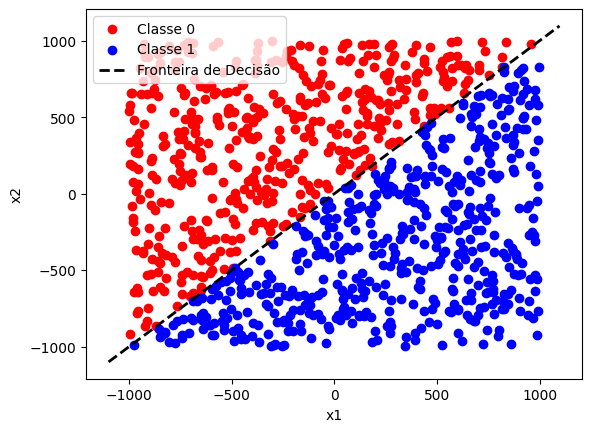

In [5]:
print('Total de Épocas: ', perceptron.epoca_count)
print('Total de Ajustes: ', perceptron.ajuste_count)

X = dados[:, :2]  # pega x1 e x2
y = dados[:, 2]   # pega yd
w = perceptron.pesos

#Plotar informações do dataset
plt.scatter(X[y==0,0], X[y==0,1], c='red', label='Classe 0')
plt.scatter(X[y==1,0], X[y==1,1], c='blue', label='Classe 1')
plt.xlabel('x1')
plt.ylabel('x2')

# Calcular Fronteira de Decisão
x_min = np.min(X[:, 0]) - 100
x_max = np.max(X[:, 0]) + 100

y_min = (-w[1] * x_min - w[0]) / w[2]
y_max = (-w[1] * x_max - w[0]) / w[2]

#Plotar linha da Fronteira de Decisão
plt.plot([x_min, x_max], [y_min, y_max], 'k--', lw=2, label='Fronteira de Decisão')

plt.legend()
plt.show()